In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re

In [2]:
df_median_wages = pd.read_csv("median_average_wages.csv")
df_mehoin = pd.read_csv("MEHOINUSA672N.csv")
df_cclacbw027sbog = pd.read_csv("CCLACBW027SBOG.csv")
df_busloans = pd.read_csv("BUSLOANS.csv")
df_sod = pd.read_csv("SOD_CustomDownload_ALL_2024_06_30.csv")
df_complaints = pd.read_csv("complaints-2025-03-27_14_21.csv")
df_national_income = pd.read_csv("national_income_zip.csv")

In [3]:
print(df_median_wages.head())
print(df_median_wages.info())
print(df_median_wages.describe(include='all'))

   year  median  average  men_median  men_average  women_median  \
0  2022   22.88    32.00       24.91        35.82         20.74   
1  2021   23.05    32.08       24.93        35.61         21.46   
2  2020   23.64    32.54       25.95        36.03         21.72   
3  2019   22.12    30.36       24.04        33.65         20.42   
4  2018   21.90    29.83       23.42        33.19         19.73   

   women_average  white_median  white_average  black_median  ...  \
0          27.86         24.96          34.49         19.60  ...   
1          28.28         25.40          34.50         19.45  ...   
2          28.75         25.98          34.86         19.85  ...   
3          26.83         24.39          32.79         18.45  ...   
4          26.21         23.97          32.44         17.57  ...   

   black_women_median  black_women_average  hispanic_women_median  \
0               19.00                23.99                  17.54   
1               18.85                24.13        

In [4]:
for df_name in ['df_median_wages', 'df_mehoin', 'df_cclacbw027sbog', 'df_busloans', 'df_sod', 'df_complaints']:
    print(f"\n{'='*50}")
    print(f"Details for {df_name}:")
    print(f"{'='*50}")
    df = eval(df_name)
    print("\nFirst few rows:")
    print(df.head())
    print("\nDataframe info:")
    print(df.info())
    print("\nDescriptive statistics:")
    print(df.describe(include='all'))


Details for df_median_wages:

First few rows:
   year  median  average  men_median  men_average  women_median  \
0  2022   22.88    32.00       24.91        35.82         20.74   
1  2021   23.05    32.08       24.93        35.61         21.46   
2  2020   23.64    32.54       25.95        36.03         21.72   
3  2019   22.12    30.36       24.04        33.65         20.42   
4  2018   21.90    29.83       23.42        33.19         19.73   

   women_average  white_median  white_average  black_median  ...  \
0          27.86         24.96          34.49         19.60  ...   
1          28.28         25.40          34.50         19.45  ...   
2          28.75         25.98          34.86         19.85  ...   
3          26.83         24.39          32.79         18.45  ...   
4          26.21         23.97          32.44         17.57  ...   

   black_women_median  black_women_average  hispanic_women_median  \
0               19.00                23.99                  17.54   
1  

In [5]:
df_median_wages = df_median_wages.rename(columns={
    'recent_high-school_graduate': 'recent_hs_grad',
    'men_recent_high-school_graduate': 'men_recent_hs_grad',
    'women_recent_high-school_graduate': 'women_recent_hs_grad'
})
for ith in ["df_median_wages"]:
    print(eval(ith).columns.tolist())

['year', 'median', 'average', 'men_median', 'men_average', 'women_median', 'women_average', 'white_median', 'white_average', 'black_median', 'black_average', 'hispanic_median', 'hispanic_average', 'white_men_median', 'white_men_average', 'black_men_median', 'black_men_average', 'hispanic_men_median', 'hispanic_men_average', 'white_women_median', 'white_women_average', 'black_women_median', 'black_women_average', 'hispanic_women_median', 'hispanic_women_average', 'recent_hs_grad', 'men_recent_hs_grad', 'women_recent_hs_grad', 'recent_college_graduate', 'men_recent_college_graduate', 'women_recent_college_graduate']


In [6]:
df_mehoin = df_mehoin.rename(columns={
    'observation_date': 'date',
    'MEHOINUSA672N': 'median_household_income'
})
for ith in ["df_mehoin"]:
    print(eval(ith).columns.tolist())

['date', 'median_household_income']


In [7]:
df_cclacbw027sbog = df_cclacbw027sbog.rename(columns={
    'observation_date': 'date',
    'CCLACBW027SBOG': 'consumer_credit_value'
})
for ith in ["df_cclacbw027sbog"]:
    print(eval(ith).columns.tolist())

['date', 'consumer_credit_value']


In [8]:
df_busloans = df_busloans.rename(columns={
    'observation_date': 'date',
    'BUSLOANS': 'business_loan_value'
})
for ith in ["df_busloans"]:
    print(eval(ith).columns.tolist())

['date', 'business_loan_value']


In [9]:
sod_columns = {
    'YEAR': 'year',
    'CERT': 'certificate_id',
    'NAMEFULL': 'bank_name',
    'ADDRESBR': 'branch_address',
    'BRNUM': 'branch_number',
    'UNINUMBR': 'unique_number',
    'STALPBR': 'branch_state',
    'ADDRESS': 'hq_address',
    'ASSET': 'total_assets',
    'BKCLASS': 'bank_class',
    'CALL': 'call_code',
    'CHARTER': 'charter_type',
    'CHRTAGNN': 'charter_agency_num',
    'CHRTAGNT': 'charter_agency_type',
    'CITY': 'hq_city',
    'CLCODE': 'class_code',
    'CNTRYNA': 'country_name',
    'DENOVO': 'denovo_flag',
    'DEPDOM': 'domestic_deposits',
    'DEPSUM': 'total_deposits',
    'DOCKET': 'docket_number',
    'ESCROW': 'escrow_amount',
    'FDICDBS': 'fdic_id',
    'FDICNAME': 'fdic_name',
    'FED': 'fed_id',
    'FEDNAME': 'fed_name',
    'INSAGNT1': 'insurance_agent',
    'INSBRDD': 'insurance_branch_date',
    'INSBRTS': 'insurance_branch_status',
    'INSURED': 'insured_status',
    'OCCDIST': 'occ_district',
    'OCCNAME': 'occ_name',
    'REGAGNT': 'regulatory_agent',
    'RSSDID': 'rssd_id',
    'SPECDESC': 'special_desc',
    'SPECGRP': 'special_group',
    'STALP': 'hq_state',
    'STCNTY': 'hq_county_code',
    'STNAME': 'hq_state_name',
    'UNIT': 'unit_code',
    'ZIP': 'hq_zip',
    'BKMO': 'bank_month',
    'BRCENM': 'branch_census_name',
    'BRSERTYP': 'branch_service_type',
    'CBSA_DIV_NAMB': 'cbsa_division_name',
    'CITY2BR': 'branch_city_alt',
    'CITYBR': 'branch_city',
    'CNTRYNAB': 'branch_country',
    'CNTYNAMB': 'branch_county_name',
    'CNTYNUMB': 'branch_county_number',
    'CONSOLD': 'consolidated_flag',
    'CSABR': 'branch_csa_code',
    'CSANAMBR': 'branch_csa_name',
    'DEPSUMBR': 'branch_deposits',
    'DIVISIONB': 'branch_division',
    'METROBR': 'branch_metro_code',
    'MICROBR': 'branch_micro_code',
    'MSABR': 'branch_msa_code',
    'MSANAMB': 'branch_msa_name',
    'NAMEBR': 'branch_name',
    'NECNAMB': 'branch_nec_name',
    'NECTABR': 'branch_necta_code',
    'PLACENUM': 'place_number',
    'SIMS_ACQUIRED_DATE': 'acquired_date',
    'SIMS_DESCRIPTION': 'branch_description',
    'SIMS_ESTABLISHED_DATE': 'established_date',
    'SIMS_LATITUDE': 'latitude',
    'SIMS_LONGITUDE': 'longitude',
    'SIMS_PROJECTION': 'geo_projection',
    'STCNTYBR': 'branch_county_code',
    'STNAMEBR': 'branch_state_name',
    'STNUMBR': 'branch_state_number',
    'USA': 'is_usa',
    'ZIPBR': 'branch_zip'
}
df_sod = df_sod.rename(columns=sod_columns)

for ith in ["df_sod"]:
    print(eval(ith).columns.tolist())

['year', 'certificate_id', 'bank_name', 'branch_address', 'branch_number', 'unique_number', 'branch_state', 'hq_address', 'total_assets', 'bank_class', 'call_code', 'charter_type', 'charter_agency_num', 'charter_agency_type', 'hq_city', 'class_code', 'country_name', 'denovo_flag', 'domestic_deposits', 'total_deposits', 'docket_number', 'escrow_amount', 'fdic_id', 'fdic_name', 'fed_id', 'fed_name', 'insurance_agent', 'insurance_branch_date', 'insurance_branch_status', 'insured_status', 'occ_district', 'occ_name', 'regulatory_agent', 'rssd_id', 'special_desc', 'special_group', 'hq_state', 'hq_county_code', 'hq_state_name', 'unit_code', 'hq_zip', 'bank_month', 'branch_census_name', 'branch_service_type', 'cbsa_division_name', 'branch_city_alt', 'branch_city', 'branch_country', 'branch_county_name', 'branch_county_number', 'consolidated_flag', 'branch_csa_code', 'branch_csa_name', 'branch_deposits', 'branch_division', 'branch_metro_code', 'branch_micro_code', 'branch_msa_code', 'branch_msa

In [10]:
complaints_columns = {
    'Date received': 'date_received',
    'Product': 'product_type',
    'Sub-product': 'product_subtype',
    'Issue': 'issue_type',
    'Sub-issue': 'issue_subtype',
    'Consumer complaint narrative': 'complaint_text',
    'Company public response': 'company_public_response',
    'Company': 'company_name',
    'State': 'state',
    'ZIP code': 'zip_code',
    'Tags': 'tags',
    'Consumer consent provided?': 'consent_provided',
    'Submitted via': 'submission_method',
    'Date sent to company': 'date_sent',
    'Company response to consumer': 'response_type',
    'Timely response?': 'is_timely',
    'Consumer disputed?': 'is_disputed',
    'Complaint ID': 'complaint_id'
}
df_complaints = df_complaints.rename(columns=complaints_columns)
for ith in ["df_complaints"]:
    print(eval(ith).columns.tolist())

['date_received', 'product_type', 'product_subtype', 'issue_type', 'issue_subtype', 'complaint_text', 'company_public_response', 'company_name', 'state', 'zip_code', 'tags', 'consent_provided', 'submission_method', 'date_sent', 'response_type', 'is_timely', 'is_disputed', 'complaint_id']


In [11]:
df_median_wages.isnull().sum()

year                              0
median                            0
average                           0
men_median                        0
men_average                       0
women_median                      0
women_average                     0
white_median                      0
white_average                     0
black_median                      0
black_average                     0
hispanic_median                   0
hispanic_average                  0
white_men_median                  0
white_men_average                 0
black_men_median                  0
black_men_average                 0
hispanic_men_median               0
hispanic_men_average              0
white_women_median                0
white_women_average               0
black_women_median                0
black_women_average               0
hispanic_women_median             0
hispanic_women_average            0
recent_hs_grad                   16
men_recent_hs_grad               16
women_recent_hs_grad        

In [12]:
columns_with_nulls = df_median_wages.columns[df_median_wages.isnull().any()].tolist()
print(f"Removing these cols: {columns_with_nulls}")

Removing these cols: ['recent_hs_grad', 'men_recent_hs_grad', 'women_recent_hs_grad', 'recent_college_graduate', 'men_recent_college_graduate', 'women_recent_college_graduate']


In [13]:
df_median_wages_clean = df_median_wages.drop(columns=columns_with_nulls)
print("\nMissing values after removal:")
print(df_median_wages_clean.isnull().sum().sum())


Missing values after removal:
0


In [14]:
print("\nRemaining columns:")
print(df_median_wages_clean.columns.tolist())


Remaining columns:
['year', 'median', 'average', 'men_median', 'men_average', 'women_median', 'women_average', 'white_median', 'white_average', 'black_median', 'black_average', 'hispanic_median', 'hispanic_average', 'white_men_median', 'white_men_average', 'black_men_median', 'black_men_average', 'hispanic_men_median', 'hispanic_men_average', 'white_women_median', 'white_women_average', 'black_women_median', 'black_women_average', 'hispanic_women_median', 'hispanic_women_average']


In [15]:
df_mehoin.isnull().sum()

date                       0
median_household_income    0
dtype: int64

In [16]:
df_mehoin_clean = df_mehoin.copy()

In [17]:
df_cclacbw027sbog.isnull().sum()

date                     0
consumer_credit_value    0
dtype: int64

In [18]:
df_cclac_clean = df_cclacbw027sbog.copy()

In [19]:
df_busloans.isnull().sum()

date                   0
business_loan_value    0
dtype: int64

In [20]:
df_busloans_clean = df_busloans.copy()

In [21]:
df_sod.isnull().sum()

year                   0
certificate_id         0
bank_name              0
branch_address         0
branch_number          0
                      ..
branch_county_code     0
branch_state_name      0
branch_state_number    0
is_usa                 0
branch_zip             0
Length: 74, dtype: int64

In [22]:
df_sod_clean = df_sod.copy()

In [23]:
df_complaints.isnull().sum()

date_received                   0
product_type                    0
product_subtype             10612
issue_type                      0
issue_subtype               53437
complaint_text              86925
company_public_response    138620
company_name                    0
state                        2564
zip_code                     1632
tags                       120046
consent_provided            52940
submission_method               0
date_sent                       0
response_type                   1
is_timely                       0
is_disputed                 97228
complaint_id                    0
dtype: int64

In [24]:
missing_columns = df_complaints.columns[df_complaints.isnull().any()].tolist()
missing_percentages = df_complaints[missing_columns].isnull().mean() * 100

In [25]:
print("Percentage of missing values by column:")
for col, pct in zip(missing_columns, missing_percentages):
    print(f"{col}: {pct:.2f}%")

Percentage of missing values by column:
product_subtype: 7.58%
issue_subtype: 38.18%
complaint_text: 62.11%
company_public_response: 99.05%
state: 1.83%
zip_code: 1.17%
tags: 85.78%
consent_provided: 37.83%
response_type: 0.00%
is_disputed: 69.48%


In [26]:
print(df_complaints["response_type"])

0                         In progress
1             Closed with explanation
2         Closed with monetary relief
3         Closed with monetary relief
4             Closed with explanation
                     ...             
139939        Closed with explanation
139940        Closed with explanation
139941        Closed with explanation
139942        Closed with explanation
139943    Closed with monetary relief
Name: response_type, Length: 139944, dtype: object


In [27]:
print(df_complaints.dtypes)

date_received              object
product_type               object
product_subtype            object
issue_type                 object
issue_subtype              object
complaint_text             object
company_public_response    object
company_name               object
state                      object
zip_code                   object
tags                       object
consent_provided           object
submission_method          object
date_sent                  object
response_type              object
is_timely                  object
is_disputed                object
complaint_id                int64
dtype: object


In [28]:
df_complaints_clean = df_complaints.copy()

columns_to_drop = ['company_public_response', 'complaint_text', 'tags', 'is_disputed']
df_complaints_clean = df_complaints_clean.drop(columns=columns_to_drop)

df_complaints_clean['product_subtype'] = df_complaints_clean.groupby('product_type')['product_subtype'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

In [29]:
df_complaints_clean['issue_subtype'] = df_complaints_clean.groupby('issue_type')['issue_subtype'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unspecified')
)

In [30]:
most_common_state = df_complaints_clean['state'].mode()[0]
df_complaints_clean['state'] = df_complaints_clean['state'].fillna(most_common_state)

In [31]:
df_complaints_clean['zip_code'] = df_complaints_clean['zip_code'].fillna('XXXXX')

In [32]:
most_common_consent = df_complaints_clean['consent_provided'].mode()[0]
df_complaints_clean['consent_provided'] = df_complaints_clean['consent_provided'].fillna(most_common_consent)

In [33]:
most_common_response = df_complaints_clean['response_type'].mode()[0]
df_complaints_clean['response_type'] = df_complaints_clean['response_type'].fillna(most_common_response)

In [34]:
print("Missing values after imputation:")
print(df_complaints_clean.isnull().sum())

Missing values after imputation:
date_received        0
product_type         0
product_subtype      0
issue_type           0
issue_subtype        0
company_name         0
state                0
zip_code             0
consent_provided     0
submission_method    0
date_sent            0
response_type        0
is_timely            0
complaint_id         0
dtype: int64


In [35]:
print(df_national_income.dtypes)

ZIP                                                    int64
Town                                                  object
State Abbreviation                                    object
State                                                 object
Metro                                                 object
Primary County                                        object
Total population                                       int64
Households - Median income (dollars)                 float64
Families - Median income (dollars)                   float64
Married-couple families - Median income (dollars)    float64
Nonfamily households - Median income (dollars)       float64
Households - Mean income (dollars)                   float64
Families - Mean income (dollars)                     float64
Married-couple families - Mean income (dollars)      float64
Nonfamily households - Mean income (dollars)         float64
Households - Total                                     int64
Households - Less than $

In [36]:
print(df_national_income.isnull().sum())

ZIP                                                      0
Town                                                    67
State Abbreviation                                      67
State                                                   67
Metro                                                 9030
Primary County                                          69
Total population                                         0
Households - Median income (dollars)                  3263
Families - Median income (dollars)                    3967
Married-couple families - Median income (dollars)     4346
Nonfamily households - Median income (dollars)        6456
Households - Mean income (dollars)                    1853
Families - Mean income (dollars)                      2404
Married-couple families - Mean income (dollars)      33353
Nonfamily households - Mean income (dollars)          3702
Households - Total                                       0
Households - Less than $10,000                         9

In [37]:
missing_columns = df_national_income.columns[df_national_income.isnull().any()].tolist()
missing_percentages = df_national_income[missing_columns].isnull().mean() * 100
print("Percentage of missing values by column:")
for col, pct in zip(missing_columns, missing_percentages):
    print(f"{col}: {pct:.2f}%")

Percentage of missing values by column:
Town: 0.20%
State Abbreviation: 0.20%
State: 0.20%
Metro: 26.74%
Primary County: 0.20%
Households - Median income (dollars): 9.66%
Families - Median income (dollars): 11.75%
Married-couple families - Median income (dollars): 12.87%
Nonfamily households - Median income (dollars): 19.12%
Households - Mean income (dollars): 5.49%
Families - Mean income (dollars): 7.12%
Married-couple families - Mean income (dollars): 98.76%
Nonfamily households - Mean income (dollars): 10.96%
Households - Less than $10,000: 2.80%
Households - $10,000 to $14,999: 2.80%
Households - $15,000 to $24,999: 2.80%
Households - $25,000 to $34,999: 2.80%
Households - $35,000 to $49,999: 2.80%
Households - $50,000 to $74,999: 2.80%
Households - $75,000 to $99,999: 2.80%
Households - $100,000 to $149,999: 2.80%
Households - $150,000 to $199,999: 2.80%
Households - $200,000 or more: 2.80%
Families - Less than $10,000: 3.73%
Families - $10,000 to $14,999: 3.73%
Families - $15,000

In [38]:
df_national_income_clean = df_national_income.copy()
df_national_income_clean = df_national_income_clean.drop(columns=['Married-couple families - Mean income (dollars)'])

In [39]:
location_cols = ['Town', 'State', 'State Abbreviation', 'Primary County']
for col in location_cols:
    df_national_income_clean[col] = df_national_income_clean[col].ffill().bfill()

In [40]:
df_national_income_clean['Metro'] = df_national_income_clean.groupby('State')['Metro'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

In [41]:
income_breakdown_cols = [col for col in df_national_income_clean.columns 
                         if any(x in col for x in ['Less than', 'to $', 'or more'])]

for col in income_breakdown_cols:
    df_national_income_clean[col] = df_national_income_clean.groupby('ZIP')[col].transform(
        lambda x: x.fillna(x.median())
    )
    
    if df_national_income_clean[col].isnull().sum() > 0:
        df_national_income_clean[col] = df_national_income_clean.groupby('State')[col].transform(
            lambda x: x.fillna(x.median())
        )
    
    if df_national_income_clean[col].isnull().sum() > 0:
        df_national_income_clean[col] = df_national_income_clean[col].fillna(df_national_income_clean[col].median())

In [42]:
problematic_cols = [
    'Households - Median income (dollars)',
    'Families - Median income (dollars)',
    'Married-couple families - Median income (dollars)',
    'Nonfamily households - Median income (dollars)',
    'Households - Mean income (dollars)',
    'Families - Mean income (dollars)',
    'Nonfamily households - Mean income (dollars)'
]

for col in problematic_cols:
    if col in df_national_income_clean.columns:
        median_value = df_national_income_clean[col].median()
        df_national_income_clean[col] = df_national_income_clean[col].fillna(median_value)
        print(f"Imputed {col} with median value: {median_value}")

Imputed Households - Median income (dollars) with median value: 69953.0
Imputed Families - Median income (dollars) with median value: 85500.0
Imputed Married-couple families - Median income (dollars) with median value: 97267.5
Imputed Nonfamily households - Median income (dollars) with median value: 41644.0
Imputed Households - Mean income (dollars) with median value: 86630.0
Imputed Families - Mean income (dollars) with median value: 101212.5
Imputed Nonfamily households - Mean income (dollars) with median value: 53278.5


In [43]:
print("Missing values after imputation:")
print(df_national_income_clean.isnull().sum())

Missing values after imputation:
ZIP                                                  0
Town                                                 0
State Abbreviation                                   0
State                                                0
Metro                                                0
Primary County                                       0
Total population                                     0
Households - Median income (dollars)                 0
Families - Median income (dollars)                   0
Married-couple families - Median income (dollars)    0
Nonfamily households - Median income (dollars)       0
Households - Mean income (dollars)                   0
Families - Mean income (dollars)                     0
Nonfamily households - Mean income (dollars)         0
Households - Total                                   0
Households - Less than $10,000                       0
Households - $10,000 to $14,999                      0
Households - $15,000 to $24,999 

In [44]:
print(df_median_wages_clean.dtypes)
print(df_mehoin_clean.dtypes)
print(df_cclac_clean.dtypes)
print(df_busloans_clean.dtypes)
print(df_sod_clean.dtypes)
print(df_complaints_clean.dtypes)
print(df_national_income_clean.dtypes)

year                        int64
median                    float64
average                   float64
men_median                float64
men_average               float64
women_median              float64
women_average             float64
white_median              float64
white_average             float64
black_median              float64
black_average             float64
hispanic_median           float64
hispanic_average          float64
white_men_median          float64
white_men_average         float64
black_men_median          float64
black_men_average         float64
hispanic_men_median       float64
hispanic_men_average      float64
white_women_median        float64
white_women_average       float64
black_women_median        float64
black_women_average       float64
hispanic_women_median     float64
hispanic_women_average    float64
dtype: object
date                       object
median_household_income     int64
dtype: object
date                      object
consumer_credit_value

In [45]:
def parse_dates(df, date_col, format=None):
    if 'year' in date_col.lower():
        dates = pd.to_datetime(df[date_col].astype(str), format='%Y')
    elif format:
        dates = pd.to_datetime(df[date_col], format=format)
    else:
        dates = pd.to_datetime(df[date_col], errors='coerce')
    return dates

In [46]:
def get_date_range(df, date_col, format=None, name=None):
    dates = parse_dates(df, date_col, format)
    min_date = dates.min()
    max_date = dates.max()
    
    if pd.isnull(min_date) or pd.isnull(max_date):
        print(f"Warning: Invalid dates found in {name}")
        return None, None
    
    return min_date, max_date

In [47]:
def find_overlap(ranges):
    valid_ranges = [(start, end) for start, end in ranges if start is not None and end is not None]
    if not valid_ranges:
        return None, None
    
    overlap_start = max(start for start, _ in valid_ranges)
    overlap_end = min(end for _, end in valid_ranges)
    
    if overlap_start > overlap_end:
        print("No overlap between datasets")
        return None, None
    
    return overlap_start, overlap_end

In [48]:
date_ranges = []

median_wages_start = pd.to_datetime('1973-01-01')
median_wages_end = pd.to_datetime('2022-12-31')
date_ranges.append((median_wages_start, median_wages_end, 'Median Wages'))

mehoin_start = pd.to_datetime('1984-01-01') 
mehoin_end = pd.to_datetime('2023-12-31')
date_ranges.append((mehoin_start, mehoin_end, 'Median Household Income'))

cclac_start = pd.to_datetime('2000-06-28')
cclac_end = pd.to_datetime('2023-12-31')  
date_ranges.append((cclac_start, cclac_end, 'Consumer Credit'))

busloans_start = pd.to_datetime('1947-01-01')
busloans_end = pd.to_datetime('2023-12-31') 
date_ranges.append((busloans_start, busloans_end, 'Business Loans'))

sod_start = pd.to_datetime('2024-01-01')
sod_end = pd.to_datetime('2024-12-31')
date_ranges.append((sod_start, sod_end, 'SOD Bank Data'))

complaints_start = pd.to_datetime('2024-12-01')  
complaints_end = pd.to_datetime('2025-03-01')  
date_ranges.append((complaints_start, complaints_end, 'CFPB Complaints'))

In [49]:
for start, end, name in date_ranges:
    print(f"{name}: {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}")

all_ranges = [(start, end) for start, end, _ in date_ranges]
overall_start, overall_end = find_overlap(all_ranges)
if overall_start and overall_end:
    print(f"Overall overlap (all datasets): {overall_start.strftime('%Y-%m-%d')} to {overall_end.strftime('%Y-%m-%d')}")
else:
    print("No overall overlap across all datasets")

economic_ranges = all_ranges[:4]  
econ_start, econ_end = find_overlap(economic_ranges)
if econ_start and econ_end:
    print(f"Economic indicators overlap: {econ_start.strftime('%Y-%m-%d')} to {econ_end.strftime('%Y-%m-%d')}")

recent_ranges = all_ranges[4:]  
recent_start, recent_end = find_overlap(recent_ranges)
if recent_start and recent_end:
    print(f"Recent data overlap: {recent_start.strftime('%Y-%m-%d')} to {recent_end.strftime('%Y-%m-%d')}")

Median Wages: 1973-01-01 to 2022-12-31
Median Household Income: 1984-01-01 to 2023-12-31
Consumer Credit: 2000-06-28 to 2023-12-31
Business Loans: 1947-01-01 to 2023-12-31
SOD Bank Data: 2024-01-01 to 2024-12-31
CFPB Complaints: 2024-12-01 to 2025-03-01
No overlap between datasets
No overall overlap across all datasets
Economic indicators overlap: 2000-06-28 to 2022-12-31
Recent data overlap: 2024-12-01 to 2024-12-31


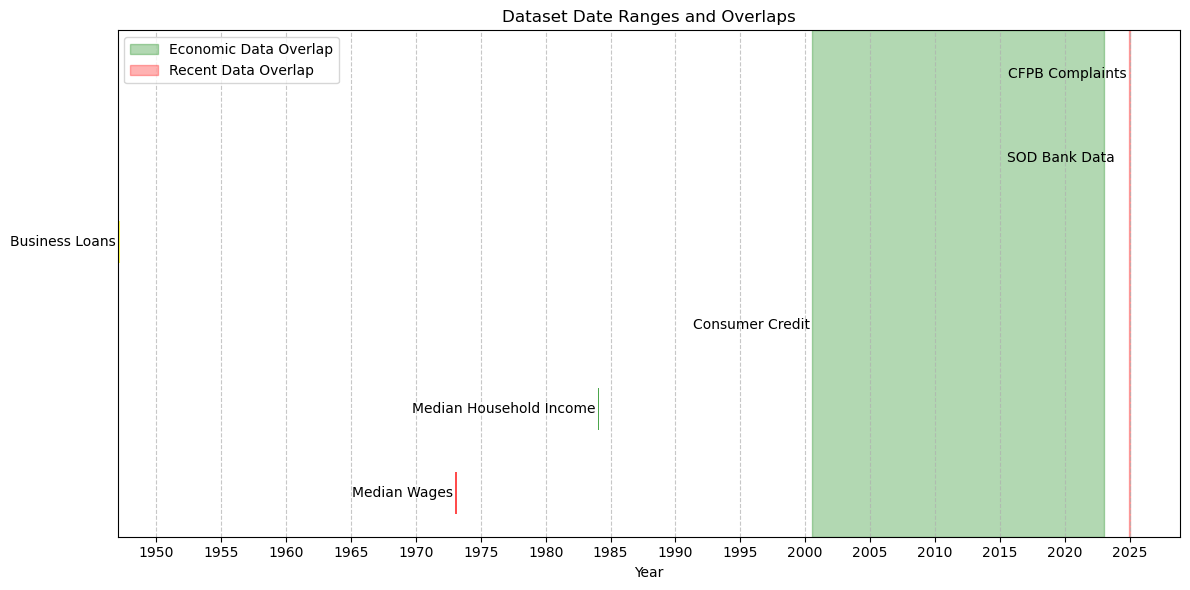

In [50]:
plt.figure(figsize=(12, 6))
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

for i, (start, end, name) in enumerate(date_ranges):
    plt.barh(i, (end - start).days / 365.25, left=mdates.date2num(start), 
             height=0.5, color=colors[i % len(colors)], alpha=0.7)
    plt.text(mdates.date2num(start) - 50, i, name, ha='right', va='center')

if econ_start and econ_end:
    plt.axvspan(mdates.date2num(econ_start), mdates.date2num(econ_end), 
                alpha=0.3, color='green', label='Economic Data Overlap')

if recent_start and recent_end:
    plt.axvspan(mdates.date2num(recent_start), mdates.date2num(recent_end), 
                alpha=0.3, color='red', label='Recent Data Overlap')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Dataset Date Ranges and Overlaps')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()

In [51]:
df_complaints_clean['product_subtype'] = df_complaints_clean.groupby('product_type')['product_subtype']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

df_complaints_clean['issue_subtype'] = df_complaints_clean.groupby('issue_type')['issue_subtype']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unspecified'))

In [52]:
if df_complaints_clean['state'].isnull().any():
    most_common_state = df_complaints_clean['state'].mode()[0]
    df_complaints_clean['state'] = df_complaints_clean['state'].fillna(most_common_state)

df_complaints_clean['zip_code'] = df_complaints_clean['zip_code'].fillna('XXXXX')

if df_complaints_clean['consent_provided'].isnull().any():
    most_common_consent = df_complaints_clean['consent_provided'].mode()[0]
    df_complaints_clean['consent_provided'] = df_complaints_clean['consent_provided'].fillna(most_common_consent)

if df_complaints_clean['response_type'].isnull().any():
    most_common_response = df_complaints_clean['response_type'].mode()[0]
    df_complaints_clean['response_type'] = df_complaints_clean['response_type'].fillna(most_common_response)

In [53]:
df_national_income_clean = df_national_income.copy()
high_missing_cols = [col for col in df_national_income.columns 
                     if df_national_income[col].isnull().sum() / len(df_national_income) > 0.9]

In [54]:
if high_missing_cols:
    print(f"Dropping columns with >90% missing data: {high_missing_cols}")
    df_national_income_clean = df_national_income_clean.drop(columns=high_missing_cols)

location_cols = ['Town', 'State', 'State Abbreviation', 'Primary County']
for col in location_cols:
    if col in df_national_income_clean.columns:
        df_national_income_clean[col] = df_national_income_clean[col].ffill().bfill()

if 'Metro' in df_national_income_clean.columns:
    df_national_income_clean['Metro'] = df_national_income_clean.groupby('State')['Metro'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
    )

numeric_cols = df_national_income_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_national_income_clean[col].isnull().sum() > 0:
        median_val = df_national_income_clean[col].median()
        df_national_income_clean[col] = df_national_income_clean[col].fillna(median_val)

Dropping columns with >90% missing data: ['Married-couple families - Mean income (dollars)']


In [55]:
def convert_to_datetime(df, cols, fmt=None):
    for c in cols:
        if c in df.columns:
            try:
                df[c] = pd.to_datetime(df[c], errors='coerce', format=fmt)
                print(f"Successfully converted {c} to datetime")
                
                nat_count = df[c].isna().sum()
                if nat_count > 0:
                    print(f"Warning: {nat_count} NaT values in {c} after conversion")
            except Exception as e:
                print(f"Error converting {c} to datetime: {e}")
    return df

In [56]:
# df_mehoin_clean = convert_to_datetime(df_mehoin_clean, ['date'])
# df_cclac_clean = convert_to_datetime(df_cclac_clean, ['date'])  
# df_busloans_clean = convert_to_datetime(df_busloans_clean, ['date'])

# df_complaints_clean = convert_to_datetime(df_complaints_clean, ['date_received', 'date_sent'])

# if 'established_date' in df_sod_clean.columns:
#     df_sod_clean = convert_to_datetime(df_sod_clean, ['established_date'], fmt='%m/%d/%Y')

df_mehoin_clean = convert_to_datetime(df_mehoin_clean, ['date'], fmt='%Y-%m-%d')

df_cclac_clean = convert_to_datetime(df_cclac_clean, ['date'], fmt='%Y-%m-%d')

df_busloans_clean = convert_to_datetime(df_busloans_clean, ['date'], fmt='%Y-%m-%d')

df_complaints_clean = convert_to_datetime(
    df_complaints_clean, 
    ['date_received', 'date_sent'], 
    fmt='%m/%d/%y' 
)

if 'established_date' in df_sod_clean.columns:
    df_sod_clean = convert_to_datetime(
        df_sod_clean, 
        ['established_date'], 
        fmt='%m/%d/%Y' 
    )

Successfully converted date to datetime
Successfully converted date to datetime
Successfully converted date to datetime
Successfully converted date_received to datetime
Successfully converted date_sent to datetime
Successfully converted established_date to datetime


In [57]:
def check_outliers(df, col, title):
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {title}")
    plt.tight_layout()
    plt.show()
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = outlier_count / len(df) * 100
    
    print(f"Outlier analysis for {col}:")
    print(f"IQR boundaries: {lower_bound:.2f} to {upper_bound:.2f}")
    print(f"Outliers: {outlier_count} ({outlier_pct:.2f}%)")
    
    if outlier_count > 0:
        print(f"Outlier range: {outliers[col].min():.2f} to {outliers[col].max():.2f}")
    
    return outliers

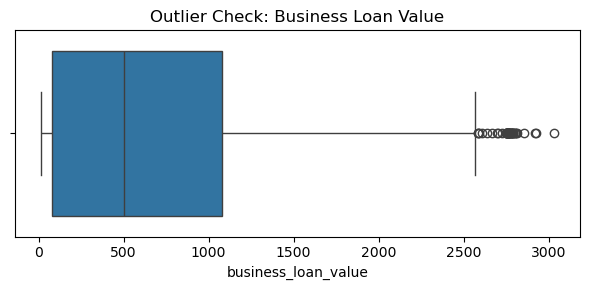

Outlier analysis for business_loan_value:
IQR boundaries: -1422.59 to 2575.88
Outliers: 45 (4.80%)
Outlier range: 2584.99 to 3033.76


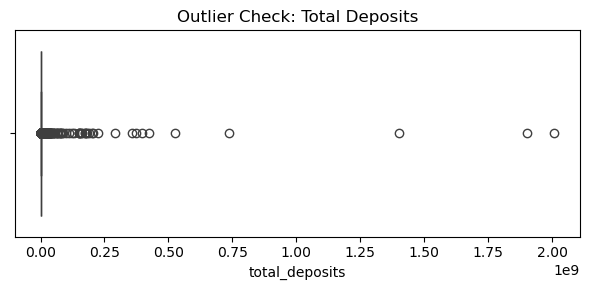

Outlier analysis for total_deposits:
IQR boundaries: 0.00 to 0.00
Outliers: 4546 (5.92%)
Outlier range: 500.00 to 2008751000.00


In [58]:
if 'business_loan_value' in df_busloans_clean.columns:
    busloans_outliers = check_outliers(df_busloans_clean, 'business_loan_value', 'Business Loan Value')

if 'total_deposits' in df_sod_clean.columns:
    sod_outliers = check_outliers(df_sod_clean, 'total_deposits', 'Total Deposits')

for df_name, df in [('df_complaints_clean', df_complaints_clean), 
                    ('df_sod_clean', df_sod_clean)]:
    dup_count = df.duplicated().sum()
    if dup_count > 0:
        print(f"NO!: {dup_count} duplicate rows found in {df_name}")

In [59]:
def create_data_dictionary(df, df_name):
    data_dict = []
    for col in df.columns:
        missing_pct = df[col].isnull().mean() * 100
        
        if np.issubdtype(df[col].dtype, np.number):
            stats = {
                'min': df[col].min(),
                'max': df[col].max(),
                'mean': df[col].mean(),
                'median': df[col].median()
            }
        else:
            unique_count = df[col].nunique()
            top_value = df[col].mode()[0] if not df[col].mode().empty else None
            stats = {
                'unique_values': unique_count,
                'top_value': top_value
            }
            
        data_dict.append({
            'dataframe': df_name,
            'column_name': col,
            'dtype': str(df[col].dtype),
            'missing_pct': f"{missing_pct:.2f}%",
            'stats': stats,
            'description': 'all files'
        })
    return pd.DataFrame(data_dict)

In [60]:
dict_median_wages = create_data_dictionary(df_median_wages_clean, 'median_wages_clean')
dict_mehoin = create_data_dictionary(df_mehoin_clean, 'mehoin_clean')
dict_cclac = create_data_dictionary(df_cclac_clean, 'cclac_clean')
dict_busloans = create_data_dictionary(df_busloans_clean, 'busloans_clean')
dict_sod = create_data_dictionary(df_sod_clean, 'sod_clean')
dict_complaints = create_data_dictionary(df_complaints_clean, 'complaints_clean')
dict_national_income = create_data_dictionary(df_national_income_clean, 'national_income_clean')

In [61]:
data_dictionary = pd.concat([
    dict_median_wages,
    dict_mehoin,
    dict_cclac,
    dict_busloans,
    dict_sod,
    dict_complaints,
    dict_national_income
], ignore_index=True)

In [62]:
data_dictionary.to_csv("data_dictionary.csv", index=False)

df_median_wages_clean.to_csv("cleaned_data/median_wages_clean.csv", index=False)
df_mehoin_clean.to_csv("cleaned_data/mehoin_clean.csv", index=False)
df_cclac_clean.to_csv("cleaned_data/cclac_clean.csv", index=False)
df_busloans_clean.to_csv("cleaned_data/busloans_clean.csv", index=False)
df_sod_clean.to_csv("cleaned_data/sod_clean.csv", index=False)
df_complaints_clean.to_csv("cleaned_data/complaints_clean.csv", index=False)
df_national_income_clean.to_csv("cleaned_data/national_income_clean.csv", index=False)